Initial value: 761.0000000000003


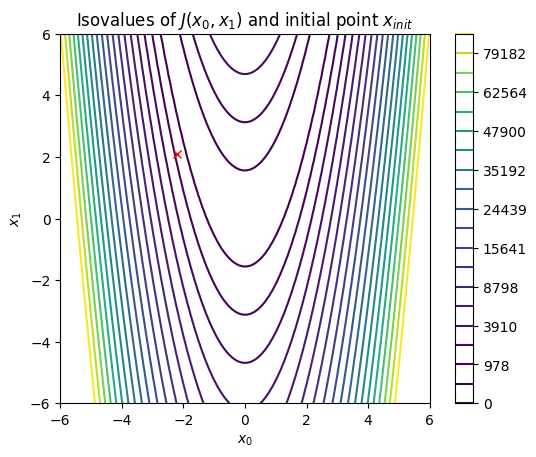

[-2417.6  -548. ]


In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
#%matplotlib notebook

x0 = np.array([-2.2,2.1])

mult = 1

m1 = 0.1
m2 = 0.9
Tol = 1e-16
Maxiter = 2000

variant = 1

def J(x):
    if variant==1:
        return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    if variant==2:
        return (x[1]**4+x[0]**4)
    if variant==3:
        return (x[1]**2+x[0]**2)**2
def GradJ(x):
    if variant==1:
        return np.array([200*(x[1]-x[0]**2)*(-2*x[0])-2*(1-x[0]),200*(x[1]-x[0]**2)])
    if variant==2:
        return np.array([4*x[0]**3,4*x[1]**3])
    if variant==3:
        return np.array([(x[1]**2+x[0]**2)*2*2*x[0],(x[1]**2+x[0]**2)*2*2*x[1]])

    
def Hess(x):
    if variant==1:
        return np.array([[2-400*x[1]+1200*x[0]**2,-400*x[0]],
                     [-400*x[0],200]])
    if variant==2:
        return np.array([[12*x[0]**2,0],
                     [0,12*x[1]**2]])
    if variant==3:
        return np.array([[8*x[0]**2+4*x[1]**2,8*x[0]*x[1]],
                     [8*x[0]*x[1],8*x[1]**2+4*x[0]**2]])    
    
def GNmat(x):
    if variant==1:
        return np.array([[800*x[0]**2+2,-400*x[0]],
                         [-400*x[0],200]])

if variant==1:
    analytic = [1,1]
if variant==2:
    analytic = [0,0]
if variant==3:
    analytic = [0,0]
print("Initial value:",J(x0))

plt.figure()
xmin=min(-5,x0[0])-1
xmax=max(5,x0[0])+1
ymin=min(-5,x0[1])-1
ymax=max(5,x0[1])+1
aX0=np.linspace(xmin,xmax,100)
aX1=np.linspace(ymin,ymax,100)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
contours = np.linspace(0,(Z.max()/2)**(1/2),20)**2
plt.contour(aX0,aX1,Z,levels=contours)#(np.linspace(0,30,10)**2))
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [2]:
def GDlinesearch(f,df,x0,tol,maxiter,m1,m2,GN=1):
    phist = []
    vhist = []
    ghist = []
    phist.append(x0)            # Create an array which holds the optimization history
 
    val = f(x0)
    gd   = df(x0)
    vhist.append(val)
    ghist.append(gd)
    iter = 0
    step = 0.1
    prevval = val
    H = Hess(x0)
    print(H)
    Hinv = np.linalg.inv(H)
    v = np.linalg.eigvals(H)  
    print("Eigenvalues: ",v)
    d = gd
    t=1

    while abs(np.linalg.norm(gd))>=Tol: 
        iter=iter+1
        #Line search
        tl=0
        tr=0
        t=1
        step=t
        # choice of the descent direction  
        if GN==1:
            H = GNmat(x0)#np.array([[-400*(x0[1]-3*x0[0]**2)+2, -400*x0[0]],[-400*x0[1], 200]])
            d = -mult*np.linalg.solve(H,gd)
        else:
            d = -gd
        
        if np.dot(d,gd)>=0:
            print("not a descent direction, use anti-gradient direction instead")
            d = -gd
    
        while (1==1):
            qt = f(x0+t*d)
            qp = np.dot(gd,d)
            qtp = np.dot(df(x0+t*d),d)
         
            #print(tl," ",tr)
            #if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
            if ((qt-val)/t<=(m1*qp)) and (qtp>=(m2*(qp))):
                step=t   # we found a good step
                break
            elif ((qt-val)/t>(m1*qp)):
                # step too big
                tr = t
            else: # step too small
                tl = t
            if(tr==0):
                t = 2*tl
            else:
                t = 0.5*(tl+tr)
            if abs(tr-tl)<1e-15*tr or tr<1e-15:
                break
            
        x0 = x0+step*(d)
        val = f(x0)
        gd   = df(x0)
        if(iter%10==0):
            print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",np.linalg.norm(gd))
        phist.append(x0)
        vhist.append(val)
        ghist.append(d)
        if(iter>maxiter):
            print('Maximum number of iterations reached!')
            break
        #if(abs(val-prevval)<Tol):
            #print('Function does not decrease enough!')
            #break
        prevval = val
    if(np.linalg.norm(d)<Tol): 
        print('Algorithm converged!')
    print('')
    print('Final output:')
    print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",np.linalg.norm(gd))
    return phist,vhist,ghist

In [5]:
x0 = [-2,2.9]
m1=0.1
m2 = 0.7
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2,GN=1)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))



[[3642.  800.]
 [ 800.  200.]]
Eigenvalues:  [3818.85168019   23.14831981]
Iter:  10 | Val:  0.0 | Step:  1  Grad:  0.0

Final output:
Iter:  10 | Val:  0.0 | Step:  1  Grad:  0.0
Number of iterations:  11
Final position:  [1. 1.]
Difference to analytical sol:  0.0


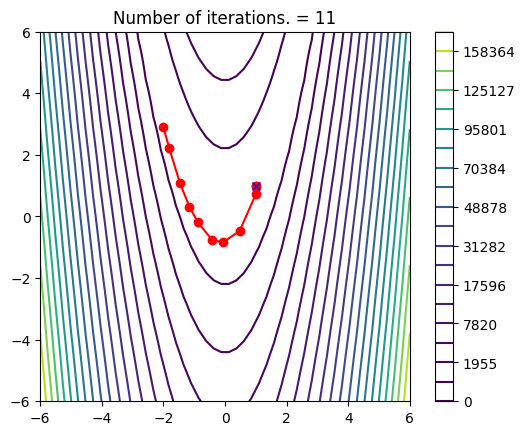

In [6]:
plt.figure(dpi=100)
#print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])

contours = np.linspace(0,(Z.max())**(1/2),20)**2

plt.contour(aX0,aX1,Z,levels=contours)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()

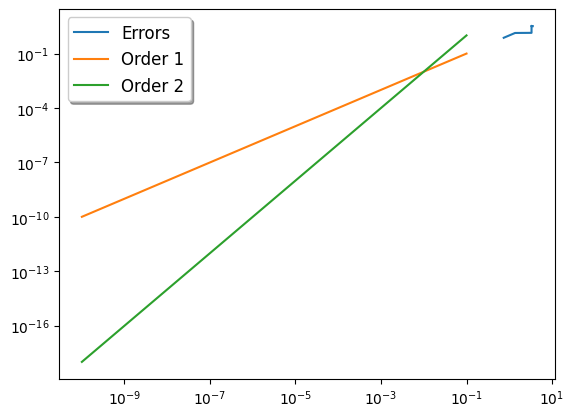

In [5]:
Niter = len(pp)
dis = np.linspace(1,Niter,Niter+1)

errors=[np.sqrt((X[0]-analytic[0])**2+(X[1]-analytic[1])**2) for X in pp]
#print(errors)

if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2
lam = 0.5*(1+np.sqrt(5))
sq2 = 100*sq**2
sq3 = 100*sq**3
sqlam = 100*sq**lam

plt.figure()
#fig, ax = plt.subplots()

plt.loglog(errors[:-1:],errors[1:],label='Errors')
plt.loglog(sq,sq,label='Order 1')

plt.loglog(sq,sq2,label='Order 2')
#plt.loglog(sq,sq3,label='Order 3')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()